# Example 5 - Frequency-Domain Analysis

In [1]:
from CircuitCalculator.Circuit.solution import ComplexSolution, TimeDomainSolution, FrequencyDomainSolution
from CircuitCalculator.SimpleAnalysis.PointerDiagram import voltage_pointer_diagram_analysis, current_pointer_diagram_analysis, power_pointer_diagram_analysis, plot_pointer_by_id
from CircuitCalculator.SimpleAnalysis.TimeSeries import steady_state_voltage_timedomain_analysis, steady_state_current_timedomain_analysis, plot_timeseries_by_id
from CircuitCalculator.SimpleAnalysis.FrequencyDomain import discrete_frequencies_voltage_analysis, discrete_frequencies_current_analysis, discrete_frequencies_power_analysis, plot_frequencies_by_id
from CircuitCalculator.SimpleAnalysis.NyquistDiagram import nyquist_voltage_analysis, plot_nyquist_by_id
from CircuitCalculator.SimpleCircuit.Elements import Schematic, Resistor, Line, Ground, RectVoltageSource, Capacitor
from CircuitCalculator.SimpleCircuit.DiagramTranslator import circuit_translator

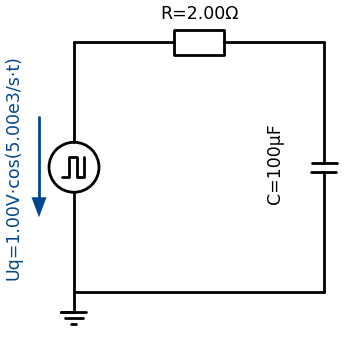

In [2]:
with Schematic(unit=5) as schematic:
    schematic += RectVoltageSource(V=1, name='Uq', w=5000, phi=0)
    schematic += Resistor(R=2, name='R').right()
    schematic += Capacitor(C=1e-4, name='C').down()
    schematic += Line().left()
    schematic += Ground()
circuit = circuit_translator(schematic)
complex_solution = ComplexSolution(circuit, w=5000)
time_domain_solution = TimeDomainSolution(circuit, w_max=1000000)
frequency_domain_solution = FrequencyDomainSolution(circuit, w_max=50000)

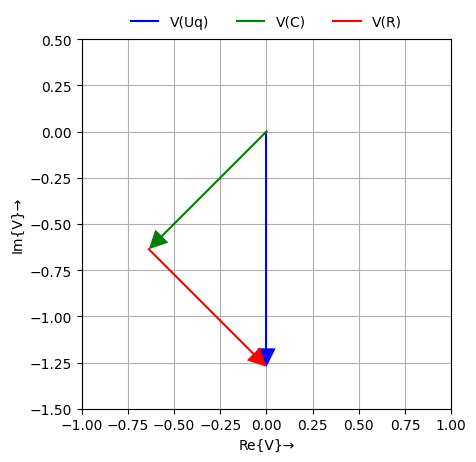

In [3]:
_ = voltage_pointer_diagram_analysis(
    plot_pointer_by_id('Uq', color='blue'),
    plot_pointer_by_id('C', color='green'),
    plot_pointer_by_id('R', origin='C', color='red'),
    solution=complex_solution,
    pd_lim=(-1, 1, -1.5, 0.5)
)

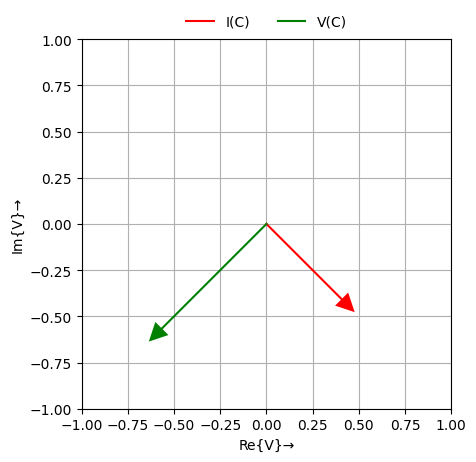

In [4]:
_ = voltage_pointer_diagram_analysis(
    plot_pointer_by_id('C', color='green'),
    solution=complex_solution,
    layout_fcn=lambda : current_pointer_diagram_analysis(
        plot_pointer_by_id('C', scaling=1.5, color='red', label='I(C)'),
        solution=complex_solution
    )
)

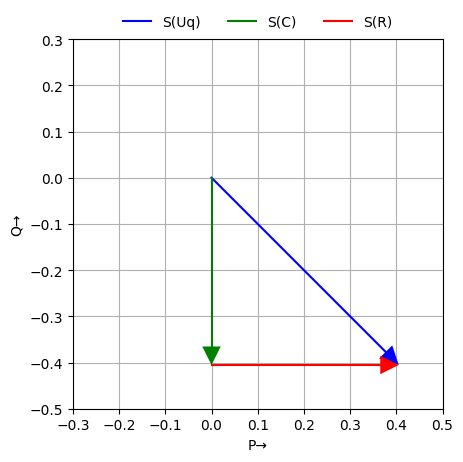

In [5]:
_ = power_pointer_diagram_analysis(
    plot_pointer_by_id('Uq', color='blue'),
    plot_pointer_by_id('C', color='green'),
    plot_pointer_by_id('R', origin='C', color='red'),
    solution=complex_solution,
    pd_lim=(-0.3, 0.5, -0.5, 0.3)
)

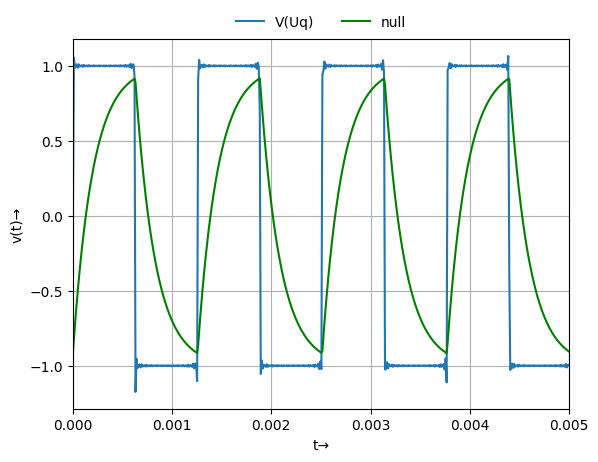

In [6]:
import numpy as np
_ = steady_state_voltage_timedomain_analysis(
    plot_timeseries_by_id('Uq'),
    plot_timeseries_by_id('C', color='green', label='null'),
    solution=time_domain_solution,
    tmax=0.005
)

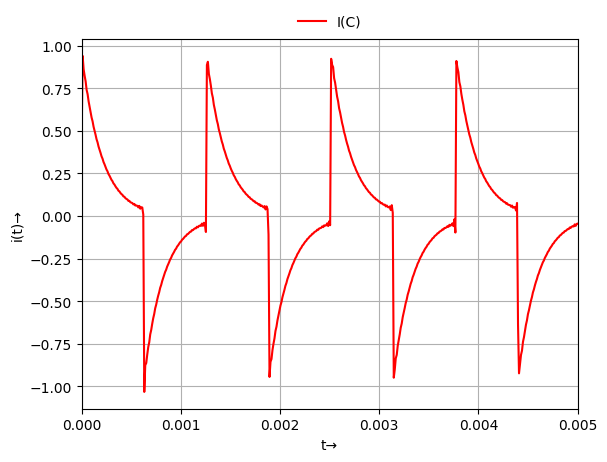

In [7]:
_ = steady_state_current_timedomain_analysis(
    plot_timeseries_by_id('C', color='red'),
    solution=time_domain_solution,
    tmax=0.005
)

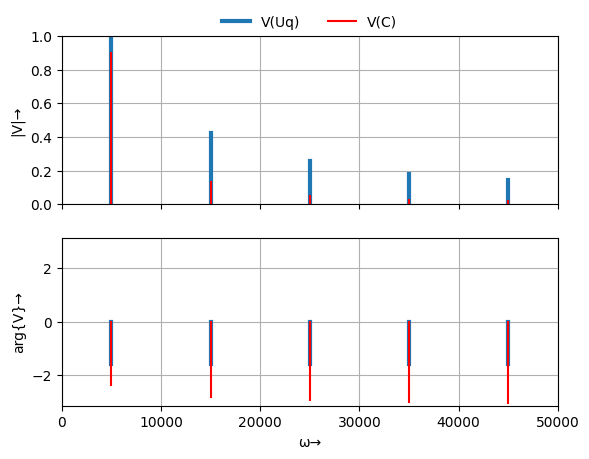

In [8]:
_ = discrete_frequencies_voltage_analysis(
    plot_frequencies_by_id('Uq', lw=3),
    plot_frequencies_by_id('C', color='red'),
    solution=frequency_domain_solution,
    wmax=50000,
)

/Users/chris/Workspace/CircuitCalculator/src/CircuitCalculator/Network/NodalAnalysis.py:140: RuntimeWarning: invalid value encountered in scalar divide
  return self.get_voltage(branch_id)/branch_element.Z


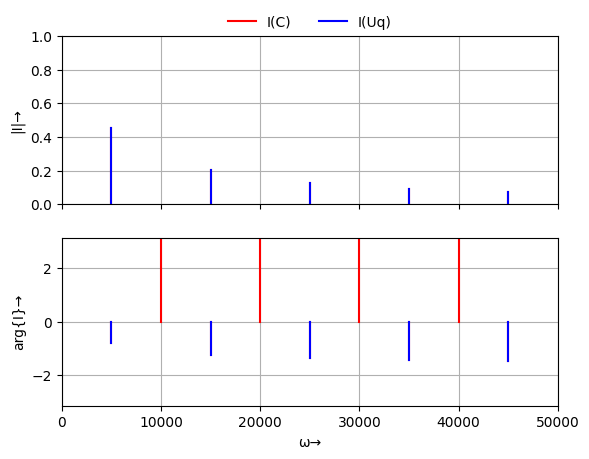

In [9]:
_ = discrete_frequencies_current_analysis(
    plot_frequencies_by_id('C', color='red'),
    plot_frequencies_by_id('Uq', color='blue'),
    solution=frequency_domain_solution,
    wmax=50000,
)

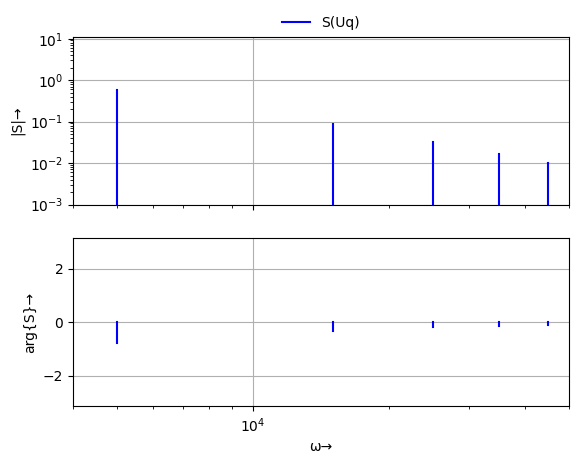

In [10]:
_ = discrete_frequencies_power_analysis(
    plot_frequencies_by_id('Uq', color='blue'),
    solution=frequency_domain_solution,
    wmin=4000,
    wmax=50000,
    abs_min=0.001,
    logw=True,
    logy=True
)

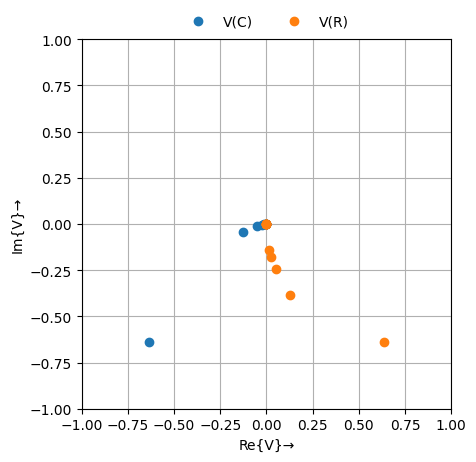

In [11]:
_ = nyquist_voltage_analysis(
    plot_nyquist_by_id('C'),
    plot_nyquist_by_id('R'),
    solution=frequency_domain_solution,
    ax_lim=(-1, 1, -1, 1)
)